# TASK 1.1: Visualizing the Data
Perform exploratory data analysis to get an understanding of the datasets. Show visualizations and statistics for all attributes of both datasets for which that makes sense. It does not make sense, e.g., for textual attributes such as the description. For some attributes, e.g. longitude and latitude, it may make sense to visualize the combination of two attributes. Finally, for every attribute print the number of missing values.

#### First we import the data files and python libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import statistics

train = pd.read_csv('../data/cases_train.csv')
test = pd.read_csv('../data/cases_test.csv')
location = pd.read_csv('../data/location.csv')

**The missing values in all datasets**

In [2]:
# the missing values for each attribute in the training dataset
train.isnull().sum()

age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64

In [3]:
# the missing values for each attribute in the training dataset
test.isnull().sum()

age                       25516
sex                       25199
province                    573
country                       0
latitude                      0
longitude                     0
date_confirmation            49
additional_information    43490
source                    16903
outcome                   46500
dtype: int64

In [4]:
# the missing values in the locations dataset
location.isnull().sum()

Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64

age
sex
province,country,
latitude,longitude,
date_confirmation,
additional_information,source,
outcome

## The Visualizations of the attributes in the "Training" Dataset:

*The distribution of gender in the data*

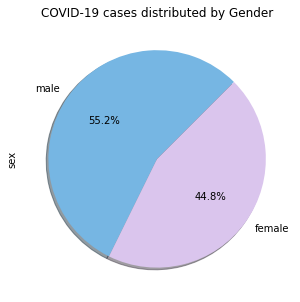

In [5]:
gender = train['sex'].value_counts()
colour = ['#76b6e3', '#dac5ed']
figure = gender.plot(kind='pie', shadow = True, title='COVID-19 cases distributed by Gender', autopct='%1.1f%%',startangle=45, colors = colour,figsize=(6, 5)).get_figure()

figure.savefig('../plots/pie_gender.png') # save output figure as an image

In [6]:
train['age'].value_counts()


35-59    10785
15-34     8314
60-79     7271
80+       4383
31.0      1697
         ...  
37-38        1
4-64         1
0.6          1
18-49        1
22-60        1
Name: age, Length: 337, dtype: int64

In [7]:
print(train["age"].head(100).dropna())

3     15-34
7     35-59
10    15-34
16       60
18     73.0
20       37
25       51
29     44.0
30       42
31       34
33     32.0
34     52.0
38     62.0
40       26
41     27.0
42     48.0
44       23
49     54.0
54        6
55     41.0
57       72
58      80+
63       21
64     43.0
66       61
67     47.0
68       85
70     37.0
71        4
75     75.0
78     34.0
84    15-34
85    15-34
86       27
87    35-59
88     37.0
91       35
94     54.0
95     37.0
96     27.0
97     34.0
99       35
Name: age, dtype: object


In [8]:
# count = 1
for value in train['age'].dropna(): # for each non-null value
    # count+=1
    # if count == 20:
    #     break
    if (re.search("[-]", value) != None): # where the value is a range
        rangeVals = re.findall(r'\d+', value)
        rangeVals = list(map(int, rangeVals)) 
        new_value = round(statistics.mean(rangeVals))
    elif (re.search("[+]", value) != None): # for values such as 80+
        rangeVals = re.findall(r'\d+', value)
        rangeVals = list(map(int, rangeVals)) 
        new_value = round(statistics.mean(rangeVals))
    elif (re.search("[.]", value) != None): # where the value is a float
        new_value = int(float(value))
    else: #where value is an int (convert from str type to int)
        new_value = int(value)

    # print(new_value)
    train['age'] = train['age'].replace([value],new_value)
    

In [ ]:
print(train["age"].head(100).dropna())